In [11]:
df = pd.read_csv('lc_dataframe(cleaning).csv')
df.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
268131,31050,21.99,1,10,1,875000.0,1,12,1,0,3,9.66,1,0,0,25770,79.3,13,0
268132,10800,7.89,1,8,1,92400.0,1,12,1,0,2,19.62,1,0,0,9760,68.7,36,1
268133,9000,9.17,1,1,1,80000.0,1,12,1,0,3,3.97,1,0,0,6320,51.8,17,0
268134,14400,25.99,0,11,4,62000.0,1,12,1,0,3,16.88,0,1,1,5677,45.1,30,0
268135,8000,12.59,1,4,3,45000.0,1,12,1,0,3,26.21,0,0,0,9097,50.8,47,1


* DataFrame
    - df: from csv
    - dfX: Feature Variable
    - dfy: Dependent Variable
    - dfX_s: Feature Variable after Scaling


* Function    
    - sm.logit(data_test, dfy): Statsmodels LogisticRegression Function
    - stratified_cross_val(data_test, dfy, n_iter) : print classification report of cross validation with StratifiedKFold

In [12]:
dfX = df.copy()
del dfX['loan_status']
dfy = pd.DataFrame(df['loan_status'], columns=['loan_status'])

In [14]:
from sklearn.preprocessing import scale, robust_scale
dfX_s = dfX.copy()
dfX_s['loan_amnt'] = scale(dfX_s['loan_amnt'].reshape(-1, 1))
dfX_s['annual_inc'] = scale(dfX_s['annual_inc'].reshape(-1, 1))
dfX_s['revol_bal'] = scale(dfX_s['revol_bal'].reshape(-1, 1))
dfX_s.tail()

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
268131,2.127000,21.99,1,10,1,13.782613,1,12,0,3,9.66,1,0,0,0.561689,79.3,13,0
268132,-0.352019,7.89,1,8,1,0.343283,1,12,0,2,19.62,1,0,0,-0.287872,68.7,36,1
268133,-0.572376,9.17,1,1,1,0.130342,1,12,0,3,3.97,1,0,0,-0.470413,51.8,17,0
268134,0.088696,25.99,0,11,4,-0.178766,1,12,0,3,16.88,0,1,1,-0.504533,45.1,30,0
268135,-0.694797,12.59,1,4,3,-0.470701,1,12,0,3,26.21,0,0,0,-0.323053,50.8,47,1


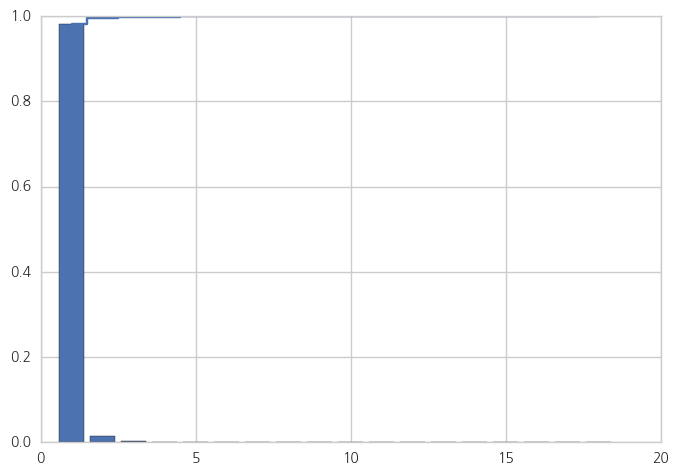

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None, whiten=False).fit(dfX_s)
var = pca.explained_variance_
plt.bar(np.arange(1, len(var)+1), var/np.sum(var), align='center')
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid")
plt.show()

In [16]:
from sklearn.metrics import classification_report

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
dfX_s.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
268131,2.127000,21.99,1,10,1,13.782613,1,12,0,3,9.66,1,0,0,0.561689,79.3,13,0
268132,-0.352019,7.89,1,8,1,0.343283,1,12,0,2,19.62,1,0,0,-0.287872,68.7,36,1
268133,-0.572376,9.17,1,1,1,0.130342,1,12,0,3,3.97,1,0,0,-0.470413,51.8,17,0
268134,0.088696,25.99,0,11,4,-0.178766,1,12,0,3,16.88,0,1,1,-0.504533,45.1,30,0
268135,-0.694797,12.59,1,4,3,-0.470701,1,12,0,3,26.21,0,0,0,-0.323053,50.8,47,1


In [19]:
dfX_test = dfX_s.ix[:, 0:3]
dfX_test.tail()

,loan_amnt,int_rate,emp_title
268131,2.127000,21.99,1
268132,-0.352019,7.89,1
268133,-0.572376,9.17,1
268134,0.088696,25.99,0
268135,-0.694797,12.59,1


In [100]:
dfX_s.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
268131,2.127000,21.99,1,10,1,13.782613,1,12,0,3,9.66,1,0,0,0.561689,79.3,13,0
268132,-0.352019,7.89,1,8,1,0.343283,1,12,0,2,19.62,1,0,0,-0.287872,68.7,36,1
268133,-0.572376,9.17,1,1,1,0.130342,1,12,0,3,3.97,1,0,0,-0.470413,51.8,17,0
268134,0.088696,25.99,0,11,4,-0.178766,1,12,0,3,16.88,0,1,1,-0.504533,45.1,30,0
268135,-0.694797,12.59,1,4,3,-0.470701,1,12,0,3,26.21,0,0,0,-0.323053,50.8,47,1


In [23]:
data = dfX_s.copy()
data['purpose'].value_counts()

3     158081
2      52785
5      15775
10     15073
7       6537
12      5005
1       3741
8       3011
9       2152
14      1963
6       1735
13      1677
4        325
11       276
Name: purpose, dtype: int64

In [25]:
purpose = data['purpose']
purpose.max()

14

In [26]:
purpose = purpose.replace([1,4,5,6,7,8,9,11,12,13,14], 0)

In [30]:
data.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
268131,2.127000,21.99,1,10,1,13.782613,1,12,0,3,9.66,1,0,0,0.561689,79.3,13,0
268132,-0.352019,7.89,1,8,1,0.343283,1,12,0,2,19.62,1,0,0,-0.287872,68.7,36,1
268133,-0.572376,9.17,1,1,1,0.130342,1,12,0,3,3.97,1,0,0,-0.470413,51.8,17,0
268134,0.088696,25.99,0,11,4,-0.178766,1,12,0,3,16.88,0,1,1,-0.504533,45.1,30,0
268135,-0.694797,12.59,1,4,3,-0.470701,1,12,0,3,26.21,0,0,0,-0.323053,50.8,47,1


In [31]:
ohe= OneHotEncoder()
purpose = ohe.fit_transform(data['purpose'].reshape(-1,1)).toarray()

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [33]:
ohe.active_features_

array([ 0,  2,  3, 10])

In [34]:
purpose

array([[ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.]])

In [35]:
purpose = pd.DataFrame(purpose, columns = ['purpose_other', 'purpose_2', 'purpose_3', 'purpose_10'])
purpose.tail()

,purpose_other,purpose_2,purpose_3,purpose_10
268131,0.0,0.0,1.0,0.0
268132,0.0,1.0,0.0,0.0
268133,0.0,0.0,1.0,0.0
268134,0.0,0.0,1.0,0.0
268135,0.0,0.0,1.0,0.0


In [36]:
data.columns

Index([u'loan_amnt', u'int_rate', u'emp_title', u'emp_length',
       u'home_ownership', u'annual_inc', u'verification_status', u'issue_d',
       u'desc', u'purpose', u'dti', u'delinq_2yrs', u'inq_last_6mths',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'initial_list_status'],
      dtype='object')

In [37]:
data_test = pd.concat([data['loan_amnt'], data['int_rate'], data['emp_title'], data['annual_inc'], data['desc'], purpose, data['dti'], data['delinq_2yrs'], data['verification_status']], axis=1)

In [171]:
data_test

,loan_amnt,int_rate,emp_title,annual_inc,desc,purpose_other,purpose_2,purpose_3,purpose_10,dti,delinq_2yrs,verification_status
0,-0.756007,13.75,1,-0.865673,91,0.0,0.0,1.0,0.0,14.29,1,0
1,-1.245690,10.28,1,-0.900018,239,1.0,0.0,0.0,0.0,1.50,0,0
2,-0.970243,7.43,1,0.903112,41,0.0,0.0,1.0,0.0,0.27,0,0
3,-1.062059,7.43,1,-0.556565,845,1.0,0.0,0.0,0.0,2.55,0,0
4,-1.527257,11.54,1,-0.900018,649,0.0,1.0,0.0,0.0,2.04,0,0
5,-0.174509,10.59,1,-0.213111,751,1.0,0.0,0.0,0.0,17.12,1,0
6,-1.343626,15.96,1,-0.347058,27,0.0,0.0,1.0,0.0,12.57,0,0
7,-1.062059,9.01,1,3.049696,22,0.0,0.0,0.0,1.0,10.00,1,0
8,-1.245690,9.96,1,-1.011640,536,1.0,0.0,0.0,0.0,16.44,0,0
9,-1.062059,7.43,1,1.332429,103,1.0,0.0,0.0,0.0,0.00,0,0


In [70]:
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [82]:
def stratified_cross_val(data_test, dfy, n_iter):
    cv = StratifiedKFold(dfy['loan_status'], n_folds=n_iter, random_state=3)
    for train_index, test_index in cv:
        X_train = data_test.ix[train_index, :]
        y_train = dfy.ix[train_index,:]
        X_test = data_test.ix[test_index, :]
        y_test = dfy.ix[test_index, :]
        model = LogisticRegression().fit(X_train, y_train)
        print(classification_report(y_test, model.predict(X_test)))
        print('='*80)

In [51]:
def sm_logit(data_test, dfy):
    model = sm.Logit(dfy, sm.add_constant(data_test)).fit()
    print(model.summary())

In [52]:
sm_logit(data_test2, dfy)

Optimization terminated successfully.
         Current function value: 0.491694
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               268136
Model:                          Logit   Df Residuals:                   268127
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 Mar 2017   Pseudo R-squ.:                 0.07845
Time:                        13:12:33   Log-Likelihood:            -1.3184e+05
converged:                       True   LL-Null:                   -1.4306e+05
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1833      0.028    112.009      0.000       3.128       3.239
lo

In [54]:
dfX_s.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
268131,2.127000,21.99,1,10,1,13.782613,1,12,0,3,9.66,1,0,0,0.561689,79.3,13,0
268132,-0.352019,7.89,1,8,1,0.343283,1,12,0,2,19.62,1,0,0,-0.287872,68.7,36,1
268133,-0.572376,9.17,1,1,1,0.130342,1,12,0,3,3.97,1,0,0,-0.470413,51.8,17,0
268134,0.088696,25.99,0,11,4,-0.178766,1,12,0,3,16.88,0,1,1,-0.504533,45.1,30,0
268135,-0.694797,12.59,1,4,3,-0.470701,1,12,0,3,26.21,0,0,0,-0.323053,50.8,47,1


In [55]:
dfX_s['pub_rec'].value_counts()

0    234589
1     33547
Name: pub_rec, dtype: int64

In [56]:
data_test.tail()

,loan_amnt,int_rate,emp_title,annual_inc,desc,purpose_other,purpose_2,purpose_3,purpose_10,dti,delinq_2yrs,verification_status
268131,2.127000,21.99,1,13.782613,0,0.0,0.0,1.0,0.0,9.66,1,1
268132,-0.352019,7.89,1,0.343283,0,0.0,1.0,0.0,0.0,19.62,1,1
268133,-0.572376,9.17,1,0.130342,0,0.0,0.0,1.0,0.0,3.97,1,1
268134,0.088696,25.99,0,-0.178766,0,0.0,0.0,1.0,0.0,16.88,0,1
268135,-0.694797,12.59,1,-0.470701,0,0.0,0.0,1.0,0.0,26.21,0,1


In [57]:
del data_test['purpose_other']
del data_test['purpose_2']
del data_test['purpose_3']

In [58]:
data_test.tail()

,loan_amnt,int_rate,emp_title,annual_inc,desc,purpose_10,dti,delinq_2yrs,verification_status
268131,2.127000,21.99,1,13.782613,0,0.0,9.66,1,1
268132,-0.352019,7.89,1,0.343283,0,0.0,19.62,1,1
268133,-0.572376,9.17,1,0.130342,0,0.0,3.97,1,1
268134,0.088696,25.99,0,-0.178766,0,0.0,16.88,0,1
268135,-0.694797,12.59,1,-0.470701,0,0.0,26.21,0,1


In [59]:
sm_logit(data_test, dfy)

Optimization terminated successfully.
         Current function value: 0.491682
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               268136
Model:                          Logit   Df Residuals:                   268126
Method:                           MLE   Df Model:                            9
Date:                Tue, 14 Mar 2017   Pseudo R-squ.:                 0.07847
Time:                        13:17:15   Log-Likelihood:            -1.3184e+05
converged:                       True   LL-Null:                   -1.4306e+05
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1829      0.028    112.002      0.000       3.127       3.239
lo

In [83]:
stratified_cross_val(data_test, dfy, 10)

             precision    recall  f1-score   support

          0       1.00      0.00      0.01      6042
          1       0.78      1.00      0.87     20773

avg / total       0.83      0.78      0.68     26815

             precision    recall  f1-score   support

          0       0.87      0.03      0.06      6042
          1       0.78      1.00      0.88     20772

avg / total       0.80      0.78      0.69     26814

             precision    recall  f1-score   support

          0       0.63      0.06      0.11      6042
          1       0.78      0.99      0.87     20772

avg / total       0.75      0.78      0.70     26814

             precision    recall  f1-score   support

          0       0.62      0.09      0.16      6042
          1       0.79      0.98      0.88     20772

avg / total       0.75      0.78      0.71     26814

             precision    recall  f1-score   support

          0       0.54      0.11      0.19      6042
          1       0.79      0.97 